In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['figure.figsize'] = [12, 7]

**Задание 1**

Загружаем файл, выводим первые строки, убеждаемся, что датафрейм сформировался нормально.

In [2]:
df = pd.read_csv('HR.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Изучаем датафрейм, типы данных по столбцам (с ними все ок), понимаем, что пропусков нет:

**Задание 2**

Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)\n
Ошибок в данных нет.

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df['salary_cat'] = pd.factorize(df.salary)[0] + 1

**Задание 3**

Рассчитать и визуализировать корреляционную матрицу для переменных

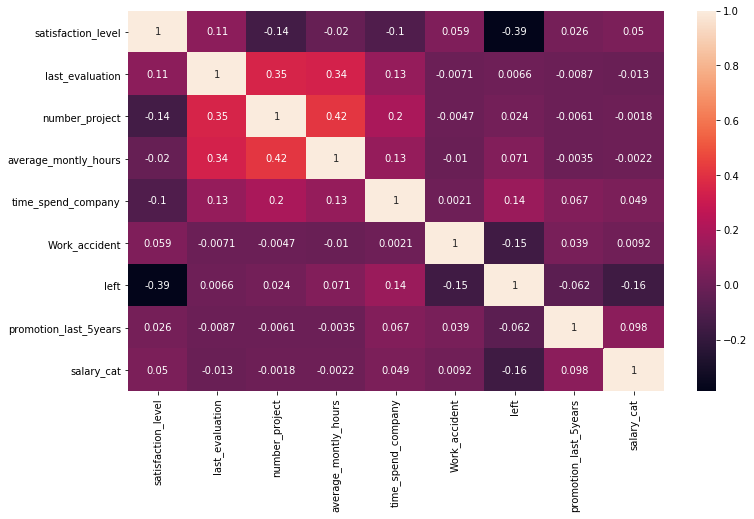

In [10]:
pearson_matrix = df.corr(method='pearson')
sns.heatmap(pearson_matrix, annot=True)

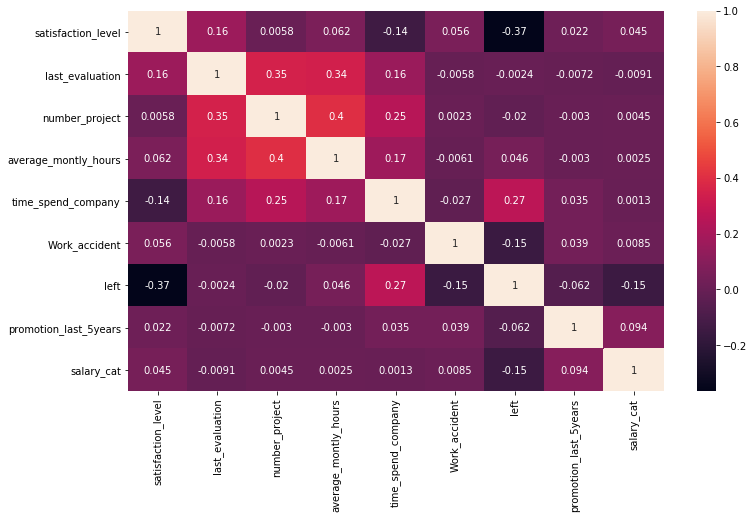

In [12]:
spearman_matrix = df.corr(method='spearman')
sns.heatmap(spearman_matrix, annot=True)

Существенных отличий между методами не наблюдаем. Сильных и даже средних корреляций не обнаруживаем. Но есть (рассматрим только значения >= |0.3|):

- слабая обратная корреляция между уходом сотрудника из компании и уровнем его удволетворенности 
- слабая корреляция между последней оценкой сотрудника и среднем количеством отработанных в месяце часов. Можно выдвинуть гипотезу, что чем больше нагрузки берет на себя сотрудник, тем он более проффессионален (гипотеза требует более детальной проверки);
- слабая корреляция между количеством проектов на сотруднике и последней его оценкой
- слабая прямяя корреляция между средним количеством рабочих часов в месяц и количеством проектов на сотруднике (что вполне логично).

**Задание 4**


Визуализировать несколько взаимосвязей между numeric переменными при помощи pairplot

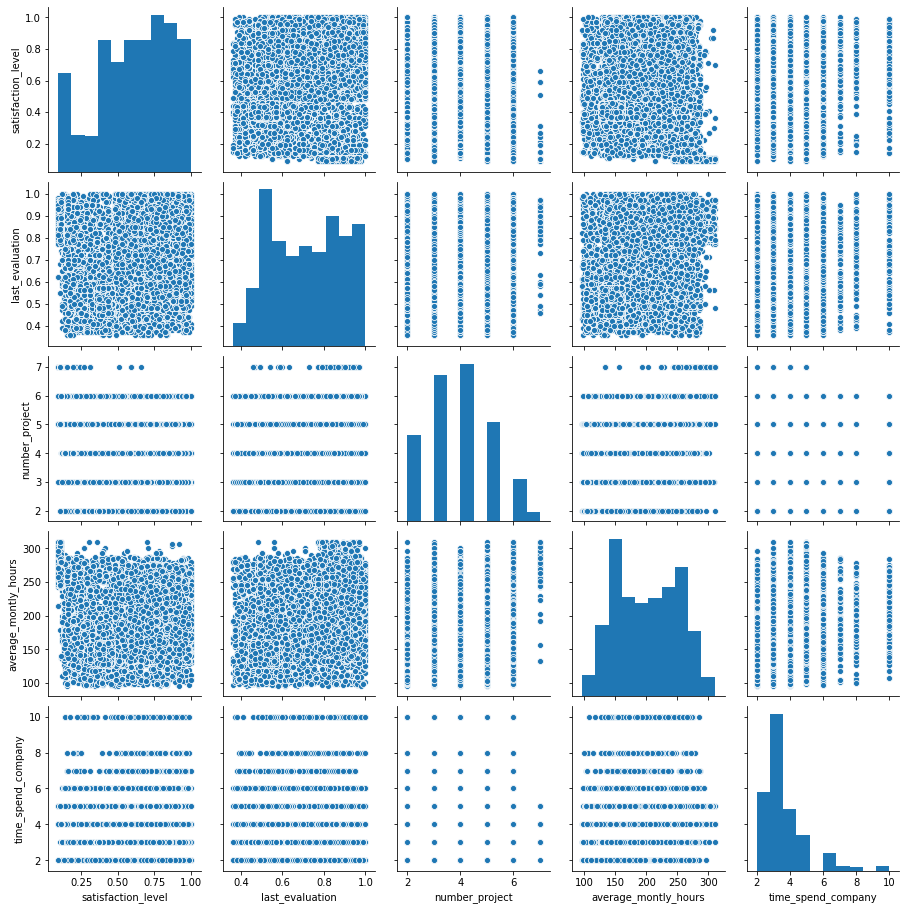

In [13]:
sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])

Полезной информации отсюда не так много, но можно сделать следующеие дополнительные выводы:

- у сотрудников с максимальным количеством проектов уровень удовлетворенности тяготеет к более никзим значениям, высоких и средних значений значительно меньше, чем в группах с меньшим количеством проектов. Это может быть связано с перегруженностью сотрудников;
- сотрудникам, кто мало проработал в компании и у кого меньший балл предыдущей оценки меньше вероятность того, что им дадут большее количество проктов в нагрузку.

**Задание 5**


С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [17]:
print(stats.ttest_ind(df['number_project'], df['average_montly_hours']))
print(stats.ttest_ind(df['satisfaction_level'], df['salary_cat']))
print(stats.ttest_ind(df['satisfaction_level'], df['average_montly_hours']))

Ttest_indResult(statistic=-483.54229603425085, pvalue=0.0)
Ttest_indResult(statistic=-175.8115102805405, pvalue=0.0)
Ttest_indResult(statistic=-491.5064991295991, pvalue=0.0)


Все t-тесты дали p-значение меньше 0.05. явных корреляций в данных нет

**Задание 6**

Cчитаем, сколько работников в каждом департаменте.
Для начала смотрим сколько всего работает человек, без учета уволившихся (будем считать, что уволившиеся маркируются 1). Итого сотрудников 11428.

In [18]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

 Итого сотрудников 11428.

In [19]:
count_by_dep = df[df['left']==0].groupby('sales').count()[['salary']].rename(columns={"salary":"count"}).reset_index().sort_values(by='count', ascending=False)
count_by_dep

,sales,count
7,sales,3126
9,technical,2023
8,support,1674
0,IT,954
6,product_mng,704
1,RandD,666
5,marketing,655
2,accounting,563
4,management,539
3,hr,524


Самый многочисленный департамент продаж, самый малочисленный - hr.

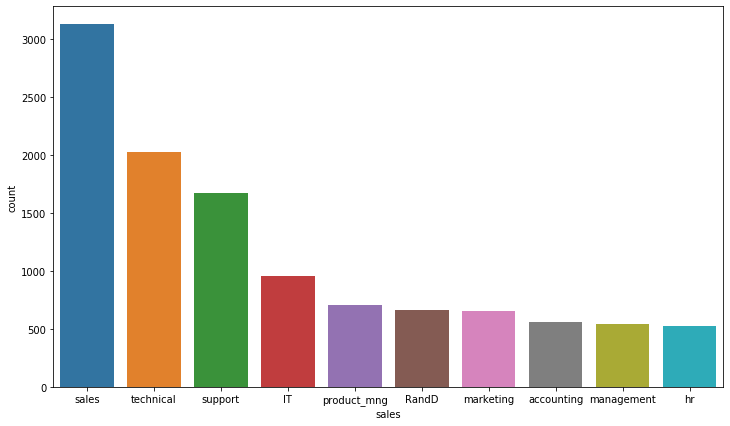

In [20]:
count_bar = sns.barplot(x=count_by_dep['sales'], y= count_by_dep['count'])


**Задание 7**

Посмотрим распределение  сотрудников по зарплатам. Видим, что сотрудников с большой зарплатой - 8.2 процента от общего числа. С низкой - в 6 раз больше.

In [21]:
df.salary.value_counts() * 100

low       731600
medium    644600
high      123700
Name: salary, dtype: int64

In [22]:
df.salary.value_counts(normalize=True)*100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

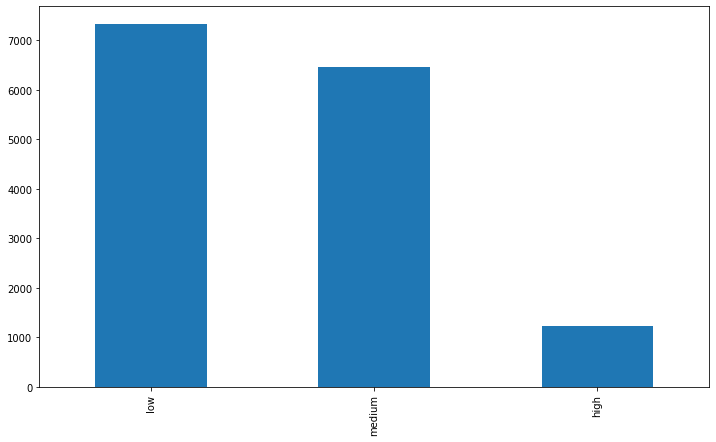

In [23]:
df.salary.value_counts().plot(kind='bar')

**Задание 8**

Считаем и визуализируем распределение сотрудников по зарплатам в разрезе департаментов.

In [26]:
salary_by_dep = df.groupby(['sales', 'salary']).count()[['left']].rename(columns={"left":"count_by_salary"}).reindex(level=1, index = ['high', 'medium', 'low'])
salary_by_dep

count_by_salary
sales       salary                 
IT          high                 83
            medium              535
            low                 609
RandD       high                 51
            medium              372
            low                 364
accounting  high                 74
            medium              335
            low                 358
hr          high                 45
            medium              359
            low                 335
management  high                225
            medium              225
            low                 180
marketing   high                 80
            medium              376
            low                 402
product_mng high                 68
            medium              383
            low                 451
sales       high                269
            medium             1772
            low                2099
support     high                141
            medium              942
            low                1146
technical   high                201
            medium             1147
            low                1372

Видим, что большее количество сотрудников с высокими зарплатами в департаменте продаж, наименьшее - в hr.

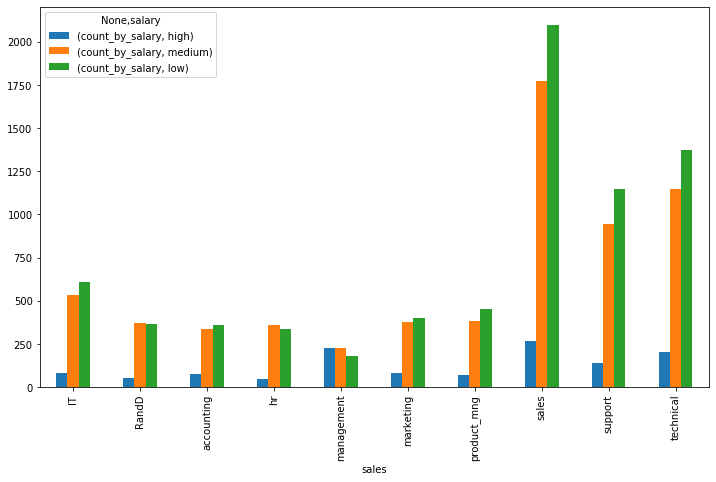

In [27]:
salary_by_dep.unstack('salary').plot(kind='bar')

**Задание 9**

Смотрим, сколько сотрудников покинуло компанию - 23.8%.

In [28]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [29]:
df['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

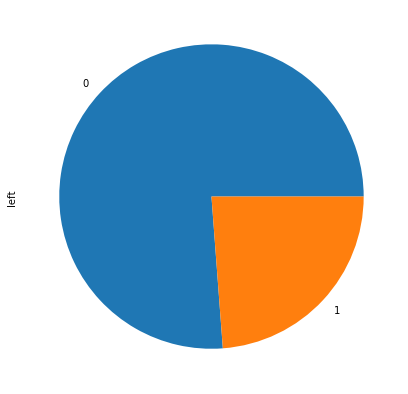

In [30]:
df['left'].value_counts().plot(kind='pie')

**Задание 10**


Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию. Рассчитаем средние значения показателей в разрезе статуса сотрудников.

In [31]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_cat
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.414730


Видим, что уровень удовлетворенности  у уволившихя меньше, чем у оставшихся.

Также видим, что уволившиеся в среднем больше часов работали в месяц (вспоминаем, что есть корреляция между отработанным времени и удовлетворенностью). Бросается в глаза то, что уволившиеся намного реже получали повышение за последние 5 лет.

Проверяем статистическую значимость данных сравнений при помощи t-test. p-value < 0.05, значит разница в средних не обусловлена случаными колебаниям.

In [33]:
print(stats.ttest_ind(df[df['left']==1]['satisfaction_level'], df[df['left']==0]['satisfaction_level']))
print(stats.ttest_ind(df[df['left']==1]['average_montly_hours'], df[df['left']==0]['average_montly_hours']))
print(stats.ttest_ind(df[df['left']==1]['average_montly_hours'], df[df['left']==0]['average_montly_hours'] ))
print(stats.ttest_ind(df[df['left']==1]['salary_cat'], df[df['left']==0]['salary_cat']))

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)
Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)
Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)
Ttest_indResult(statistic=-19.58216626170969, pvalue=2.475238171818194e-84)
